<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Haar_casade_EyeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from google.colab.patches import cv_imshow

In [3]:
from google.colab import files
files.upload()

Saving exo.jfif to exo.jfif
Saving eye_tree.xml to eye_tree.xml
Saving front_face.xml to front_face.xml
Saving obama.jpg to obama.jpg


{'exo.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x15\x15\x17\x17\x1a\x17\x19\x18\x18\x18\x17\x17\x18\x17\x17\x1d\x18\x17\x17\x1a\x17\x18\x19\x18\x1d( \x18\x1a%\x1d\x15\x17!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-\x1f\x1d%-------------------------------------------7----77\xff\xc0\x00\x11\x08\x01\x03\x00\xc2\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x03\x04\x00\x01\x07\x02\x08\xff\xc4\x00@\x10\x00\x01\x03\x01\x05\x04\x08\x04\x04\x04\x06\x02\x03\x00\x00\x00\x01\x02\x03\x11\x00\x04\x05\x12!1\x06AQa\x13"q\x81\x91\xa1\xb1\xd12B\xc1\xf0#Rr\xe1\x07\x14b\xa2\x153CS\xb2\xf1$\x82s\xd2\xe2\xff\xc4\x00\x18\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\xff\xc4\x00!\x11\x00\x02\x02\x03\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x12!1\x0

In [4]:
def rescale (frame, scale=2):
  width = frame.shape[1]*scale
  height = frame.shape[0]*scale
  dimension = (width, height)
  return cv.resize(frame, dimension, interpolation = cv.INTER_AREA)


In [32]:
obama = rescale(cv.imread('obama.jpg'))
gray_obama = cv.cvtColor(obama, cv.COLOR_BGR2GRAY)
exo = rescale(cv.imread('exo.jfif'))
gray_exo = cv.cvtColor(exo, cv.COLOR_BGR2GRAY)

In [6]:
face_cascade = cv.CascadeClassifier('front_face.xml')
eye_cascade = cv.CascadeClassifier('eye_tree.xml')

In [33]:
face_rect = face_cascade.detectMultiScale(gray_obama)
for (x,y,w,h) in face_rect:
  cv.rectangle(obama, (x,y),(x+w,y+h), (0,255,255), 2)
  ROI = gray_obama[y:y+h,x:x+w]
  eye_circle = eye_cascade.detectMultiScale(ROI,minNeighbors=2)
  for (a,b,c,d) in eye_circle:
    center = (x+a+c//2, y+b+d//2)
    radius = int(round(c+d)*0.25)
    cv.circle(obama, center, radius, (0,255,255), 2)

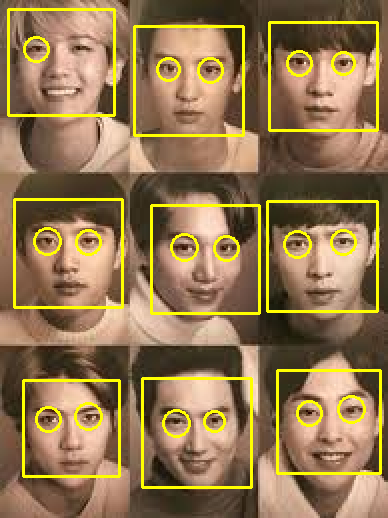

In [31]:
cv_imshow(exo)

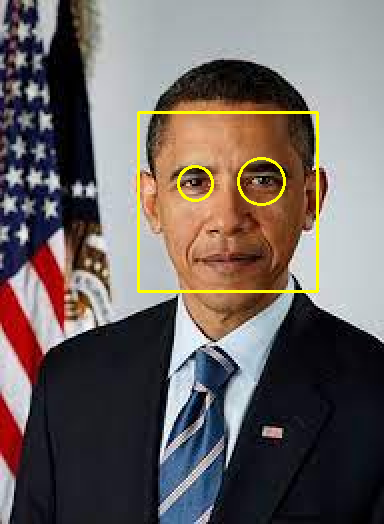

In [34]:
cv_imshow(obama)